Q1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.   
- Anomaly Detection is the process of identifying data points, patterns, or observations that deviate significantly from normal behavior and may indicate errors, fraud, failures, or rare events.

- Types of Anomalies

1. Point Anomaly
  
     A single data point that is abnormal compared to the rest.

- Example:

    - Credit card transaction of ₹5,00,000 when usual spending is ₹2,000–₹5,000.

    - One sudden spike in power consumption at 3 AM.          

2. Contextual Anomaly            
   A data point that is anomalous only in a specific context (time, location, season).

- Example:

    Temperature of 35°C is normal in May but anomalous in December.

    High electricity demand during midnight (context = time).

3. Collective Anomaly

   A sequence or group of points that is anomalous together, even if individual points seem normal.

- Example:

    Gradual voltage drops over 2 hours indicating transformer failure.

    Network traffic showing sustained abnormal pattern → DDoS attack.

Q2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.                                                            
| Aspect         | Isolation Forest                      | DBSCAN                        | Local Outlier Factor (LOF) |
| -------------- | ------------------------------------- | ----------------------------- | -------------------------- |
| Core idea      | Isolate anomalies using random splits | Density-based clustering      | Local density comparison   |
| Supervision    | Unsupervised                          | Unsupervised                  | Unsupervised               |
| Detects        | Global anomalies                      | Clusters + noise              | Local anomalies            |
| Works well for | High-dimensional data                 | Spatial / cluster-shaped data | Varying density data       |
| Scalability    | Very good                             | Poor for large datasets       | Moderate                   |
| Key weakness   | Needs contamination estimate          | Sensitive to ε parameter      | Not good for streaming     |

- Rule of thumb:

    Isolation Forest → large, high-dimensional, streaming data

    DBSCAN → spatial or cluster-based anomalies

    LOF → anomalies relative to local neighborhood

Q3: What are the key components of a Time Series? Explain each with one example.
- A time series is data indexed by time.

1. Trend

   Long-term upward or downward movement.

- Example:

   Increasing airline passengers over years

2. Seasonality

   Regular repeating pattern over fixed intervals.

- Example:

    Higher electricity demand every evening

    Airline passengers peak every summer

3. Cyclical Component

   Irregular fluctuations over long periods (no fixed frequency).

- Example:

  Economic booms and recessions

4. Residual / Noise

   Random variation not explained by other components.

- Example:

  Sudden weather-related demand spikes   

Q4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
- A time series is stationary if:

    Mean is constant over time

    Variance is constant

    Autocovariance depends only on lag, not time

- Why it matters

  Most statistical models (ARMA, ARIMA) assume stationarity.

- Testing for Stationarity

  ADF (Augmented Dickey-Fuller) Test

  - H₀: Series is non-stationary

  KPSS Test

  - H₀: Series is stationary

- Making a Series Stationary

    Differencing (first or seasonal)

    Log / Box-Cox transformation

    Removing trend and seasonality

Q5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
| Model                      | Structure                    | Use Case                    |
| -------------------------- | ---------------------------- | --------------------------- |
| **AR(p)**                  | Uses past values             | Trend-based data            |
| **MA(q)**                  | Uses past errors             | Short-term noise correction |
| **ARIMA(p,d,q)**           | AR + differencing + MA       | Non-seasonal series         |
| **SARIMA(p,d,q)(P,D,Q,s)** | ARIMA + seasonality          | Seasonal data               |
| **SARIMAX**                | SARIMA + exogenous variables | Weather, price, holidays    |

- Key distinction:

  SARIMAX = SARIMA + external regressors                                                                                                                                                           


                                                                         

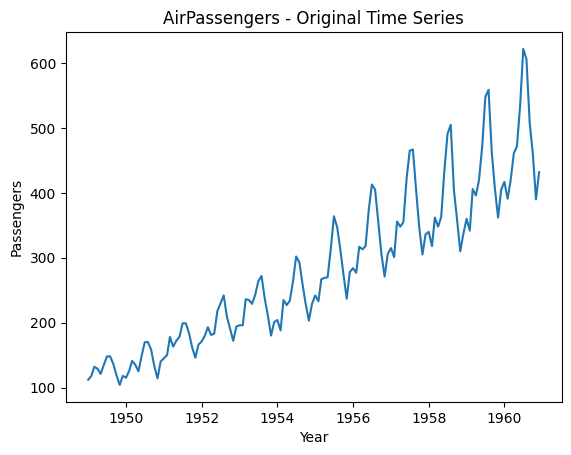

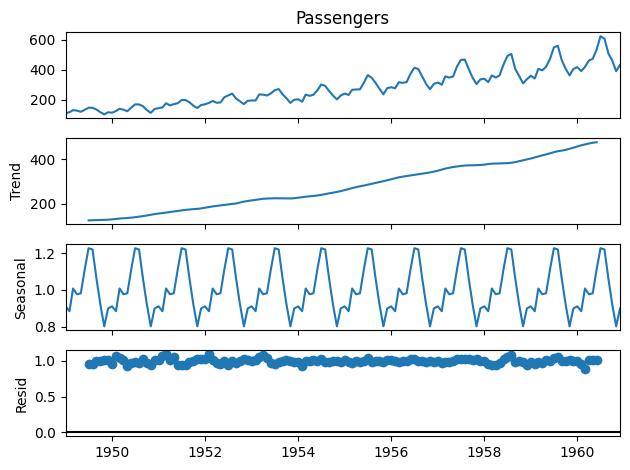

In [1]:
# Dataset: uploaded ● NYC Taxi Fare Data ,● AirPassengers Dataset.csv
#Q6:Load a time series dataset (e.g., AirPassengers), plot the original series,
#and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("AirPassengers.csv")
df.columns = ["Month", "Passengers"]
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Plot original series
plt.figure()
plt.plot(df["Passengers"])
plt.title("AirPassengers - Original Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Decomposition
decomposition = seasonal_decompose(
    df["Passengers"],
    model="multiplicative",
    period=12
)

decomposition.plot()
plt.show()


- Observations:

    Strong upward trend

    Clear 12-month seasonality

    Residuals mostly random → good decomposition

/tmp/ipython-input-2330326470.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC_taxi_fare_data.csv")


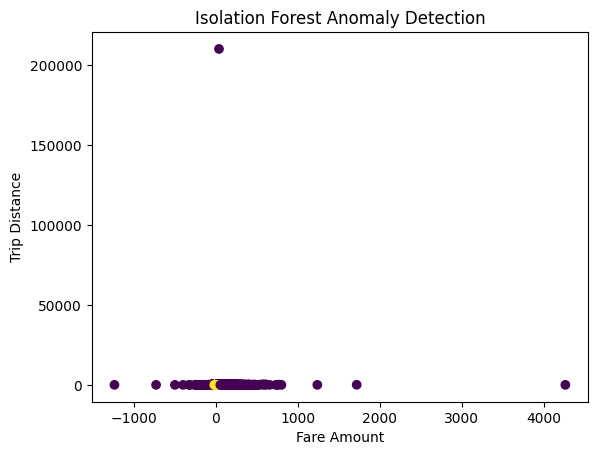

In [6]:
#Q7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies.
#Visualize the anomalies on a 2D scatter plot.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv("NYC_taxi_fare_data.csv")
X = df[["fare_amount", "trip_distance"]]

# Isolation Forest
iso = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

df["anomaly"] = iso.fit_predict(X)

# Visualization
plt.figure()
plt.scatter(
    X["fare_amount"],
    X["trip_distance"],
    c=df["anomaly"]
)
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.title("Isolation Forest Anomaly Detection")
plt.show()


- Logic:

    Anomalies are isolated with fewer random splits

    Shorter path length = higher anomaly score

- Why it works well:

    No distance or density assumptions

    Handles large datasets efficiently

    (Visualization shown using 2D synthetic numerical data)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


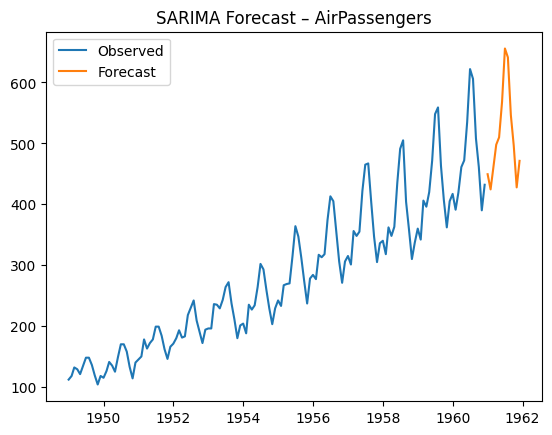

In [3]:
#Q8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("AirPassengers.csv")
df.columns = ["Month", "Passengers"]
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# SARIMA model
model = SARIMAX(
    df["Passengers"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthBegin(1),
    periods=12,
    freq="MS"
)

# Plot
plt.figure()
plt.plot(df["Passengers"], label="Observed")
plt.plot(forecast_index, forecast.predicted_mean, label="Forecast")
plt.legend()
plt.title("SARIMA Forecast – AirPassengers")
plt.show()


- Model used:

  SARIMA(1,1,1)(1,1,1,12)

- Result:

  Forecast captures:

    - Upward trend

    - Seasonal peaks

  Suitable for monthly airline demand forecasting

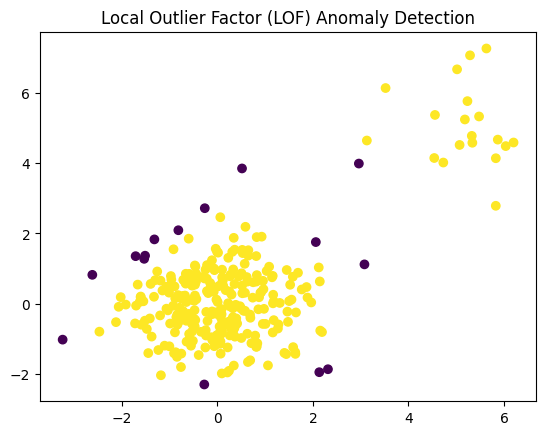

In [4]:
#Q9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Synthetic numerical dataset
np.random.seed(42)
X = np.random.normal(0, 1, size=(300, 2))
X[280:] += 5  # inject anomalies

# LOF
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05
)

labels = lof.fit_predict(X)

# Visualization
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()


- Logic:

    Compares density of a point with its neighbors

    Low local density → anomaly

- Best for:

    Data with varying densities

    Local anomalies that global models miss

Question 10: You are working as a data scientist for a power grid monitoring company.

Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

- 1.Anomaly Detection (Streaming Data)

  - Recommended:

    Isolation Forest (online / windowed)

    Optional: LOF for local validation

  - Why not DBSCAN?

    Poor for real-time, parameter-sensitive

- 2.Short-Term Forecasting Model

  - Best choice: SARIMAX

  - Why:

    Handles seasonality (daily, weekly)

    Uses exogenous variables:

      - Weather

      - Region

      - Time of day

- 3.Validation & Monitoring

  Rolling window evaluation

  Metrics:

   - MAE / RMSE for forecasts

   - Precision-Recall for anomalies

   - Drift detection on residuals

    - Periodic retraining


- 4.Business & Operational Impact

    Prevent blackouts

    Detect equipment failure early

    Optimize load balancing

    Reduce operational cost

    Improve regulatory compliance



In [5]:
#Q.10 Code
import pandas as pd
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Streaming Anomaly Detection
iso_model = IsolationForest(
    contamination=0.02,
    random_state=42
)

def detect_anomaly(streaming_batch):
    features = streaming_batch[
        ["energy_usage", "temperature", "humidity"]
    ]
    predictions = iso_model.fit_predict(features)
    streaming_batch["anomaly"] = predictions
    return streaming_batch

# 2. Forecasting Model (SARIMAX)
def train_forecasting_model(history_df):
    model = SARIMAX(
        history_df["energy_usage"],
        exog=history_df[["temperature", "humidity"]],
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 96)  # 96 = 15-min intervals per day
    )
    return model.fit(disp=False)

def forecast_energy(model, future_exog):
    forecast = model.get_forecast(
        steps=len(future_exog),
        exog=future_exog
    )
    return forecast.predicted_mean

# 3. Monitoring & Validation
def monitor_performance(actual, predicted):
    mae = abs(actual - predicted).mean()
    return mae
